# Zadanie 1b  
Celem ćwiczeń jest implementacja metody gradientu prostego.

Należy zaimplementować metodę gradientu prostego, służącą do znajdywania minimum lokalnego zadanej funkcji celu:

$$\theta_{t+1}=\theta_{t} - \eta\nabla f(\theta_{t})$$
gdzie:
- $f(\theta_{t})$ to funkcja celu dla której szukamy minimum,
- $\theta_{t}$ to parametry funkcji celu w kroku $t$,
- $\eta$ to współczynnik uczenia definiujący tempo zmiany parametrów (ang. learning rate), który powinien być skalarem o niskiej wartości.

W ćwiczeniu należy zaimplementować tę metodę do znalezienia minimów lokalnych dwóch funkcji (podanych poniżej). Dodatkowo należy przebadać wpływ współczynnika uczenia $\eta$  oraz różnych parametrów początkowych $\theta_{t=0}$ na jakość rozwiązania. Należy zwizualizować proces minimalizacji, czyli pośrednie parametry $\theta_{t}$ na wykresie 2D.

W poniższej implementacji należy uzpełnić metody klasy `SimpleGradientDescent` i użyć ich do realizacji zadania.    
  
## Punktacja:    
 - Implementacja kroku gradientu prostego. **1 pkt**  
 - Przeprowadzenie przeszukiwania minimum na obu funkcjach - poprawny wynik. **1 pkt**  
 - Wizualizacja przeszukiwania z wielu miejsc początkowych i dla różnych wartości $\eta$. **2 pkt**


In [127]:
from typing import Callable, Tuple
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

Funkcje do przeszukania:
\begin{equation}
f(\textbf{x})=x_1^2+x_2^2
\end{equation}

\begin{equation}
g(x) = 1.5-\exp \left\{-x_1^2-x_2^2\right\}-0.5 \exp \left\{-\left(x_1-1\right)^2-\left(x_2+2\right)^2\right\}
\end{equation}

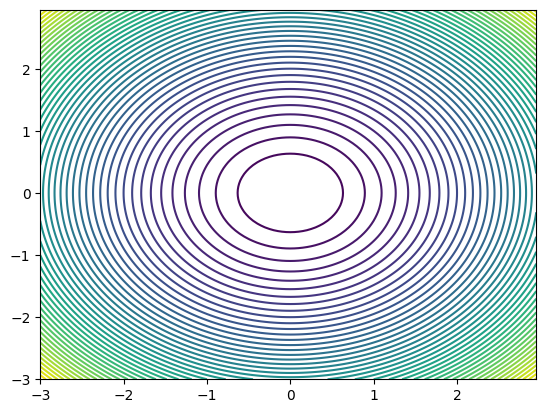

In [128]:
# Function to analyze
X = np.arange(-3, 3, 0.05)
Y = np.arange(-3, 3, 0.05)
X, Y = np.meshgrid(X, Y)
Z = X**2 + Y**2

# Contour plot en 2D
plt.figure()
plt.contour(X, Y, Z, 50)

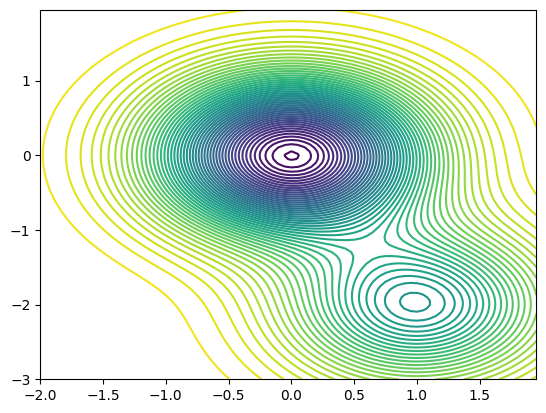

In [129]:
X = np.arange(-2, 2, 0.05)
Y = np.arange(-3, 2, 0.05)
X, Y = np.meshgrid(X, Y)
Z =1.5-np.exp(-X**(2)-Y**(2))-0.5*np.exp(-(X-1)**(2)-(Y+2)**(2))
# Contour plot en 2D

plt.figure()
plt.contour(X, Y, Z, 50)

Gradienty funkcji
\begin{equation}
\nabla f(x)=
\begin{bmatrix}
2x_1 \\
2x_2
\end{bmatrix}
\end{equation}

\begin{equation}
\nabla g(x)=
\begin{bmatrix}
2 x_1 \exp \left\{-x_1^2-x_2^2\right\}+\left(x_1-1\right) \exp \left\{-\left(x_1-1\right)^2-\left(x_2+2\right)^2\right\} \\
2 x_2 \exp \left\{-x_1^2-x_2^2\right\}+\left(x_2+2\right) \exp \left\{-\left(x_1-1\right)^2-\left(x_2+2\right)^2\right\}
\end{bmatrix}
\end{equation}

In [130]:
class SimpleGradientDescent:
    X = np.arange(-3, 3, 0.05)
    Y = np.arange(-3, 3, 0.05)
    X, Y = np.meshgrid(X, Y)

    def __init__(self,
                 func: Callable[[float, float], float],
                 grad_func: Callable[[float, float], Tuple[float, float]],
                 alpha:float=0.1):
        self.alpha = alpha
        self.func = func
        self.grad_func = grad_func
        #! changed
        self.trace = np.ndarray((0, 2), np.float64)

    def _calc_Z_value(self):
        self.Z = self.func(self.X, self.Y)

    def plot_func(self):
        self._calc_Z_value()
        plt.figure()
        plt.contour(self.X, self.Y, self.Z, 50)
        plt.title(f'alpha={self.alpha}')
        if len(self.trace)>0:
            plt.scatter(self.trace[:,0], self.trace[:,1], s=5, c='black')


    def calculate_func_vale(self, x1:float, x2:float) -> float:
        return self.func(x1, x2)

    def calculate_func_grad(self, x1:float, x2:float) -> Tuple[float, float]:
        return self.grad_func(x1, x2)

    def gradient_descent_step(self, x1:float, x2:float) -> Tuple[float, float]:
        grad = self.grad_func(x1, x2)
        return tuple(-1 * self.alpha * val for val in grad)

    def minimize(self, x1_init:float, x2_init:float, steps:int, verbose:int=0, plot:bool=False, eps=1e-6) -> float:
        x1, x2 = x1_init, x2_init

        length, width = self.trace.shape
        self.trace.resize((length + steps, width))
        self.trace[length] = [x1, x2]

        for counter in range(1, steps):
            dir1, dir2 = self.gradient_descent_step(x1, x2)
            x1, x2 = x1 + dir1, x2 + dir2
            self.trace[length + counter,:] = [x1,x2]
            if np.abs(dir1) + np.abs(dir2) < eps:
                self.trace.resize((length + counter, width))
                break

        return self.calculate_func_vale(x1, x2)

# Testowanie

In [131]:
starting_points = [(-2, -2), (-2, 0), (-2, 2), (-1, -1), (-1, 1), (0, -2), (0, -1), (0, 2), (1, -2), (1, 0), (1, 2), (2, -1), (2, -2), (2, 1)]
alphas=[.01, .05, .1, .3]
steps = 100

def measure_sgd(func, func_grad, s_points, steps, alpha):
    results = []
    sgd = SimpleGradientDescent(func, func_grad, alpha)
    for x1, x2 in s_points:
        val = sgd.minimize(x1, x2, steps, eps=1e-8)
        results.append(val)
    sgd.plot_func()
    return results



## Funkcja 1

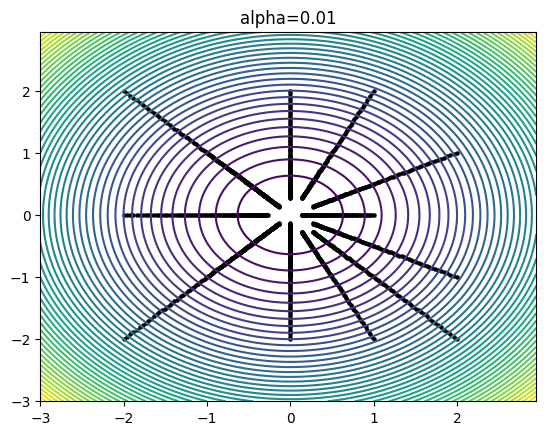

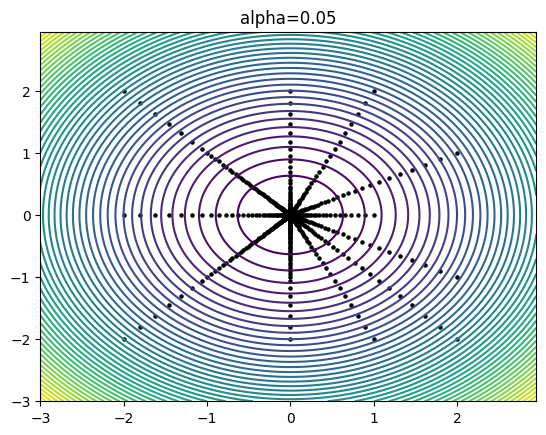

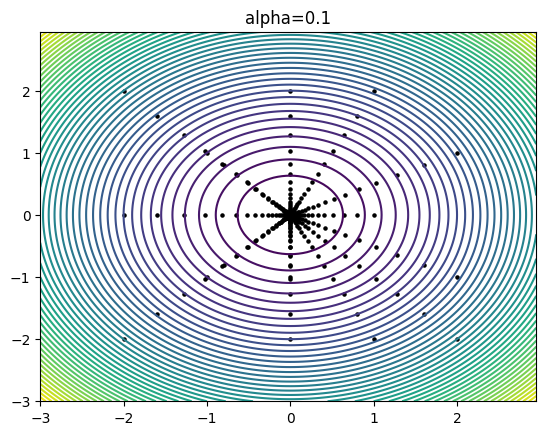

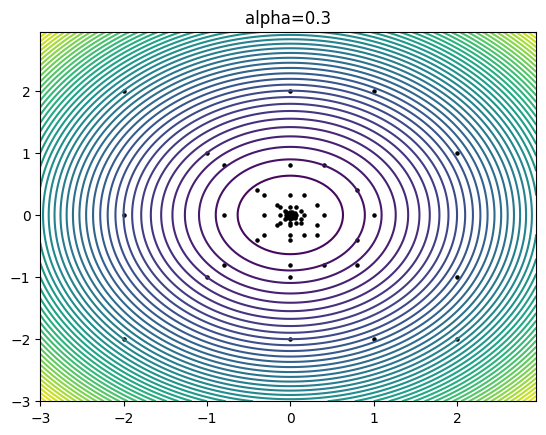

In [132]:
def f(x1: float, x2: float) -> float:
    return x1**2 + x2**2

def f_grad(x1: float, x2: float) -> Tuple[float, float]:
    return (2*x1, 2*x2)

for alpha in alphas:
    results = measure_sgd(f, f_grad, starting_points, steps, alpha)
    # for sp, val in zip(starting_points, results):
    #     print(f'{alpha=}, {sp} -> {val}')


## Funkcja 2

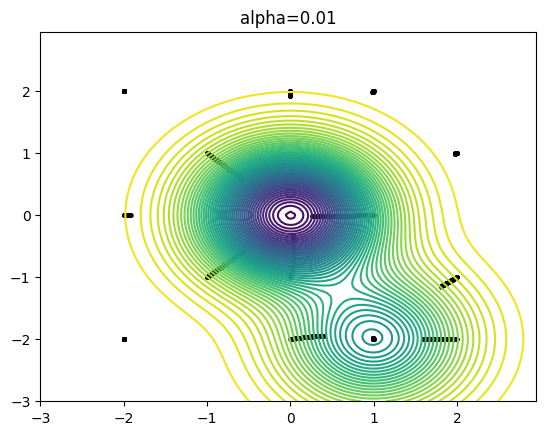

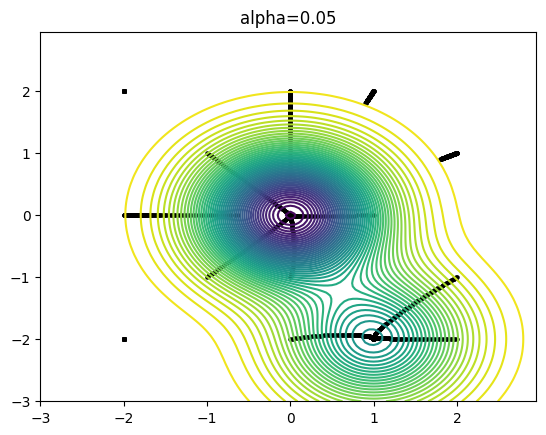

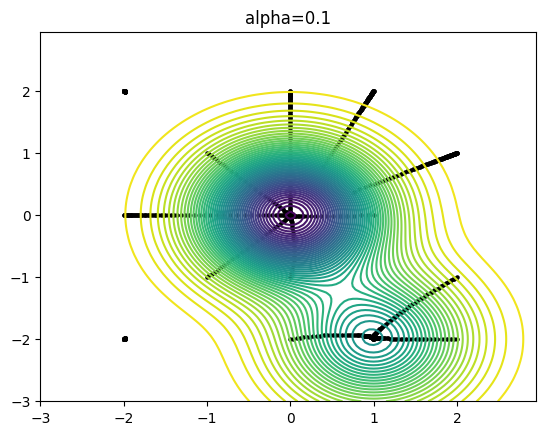

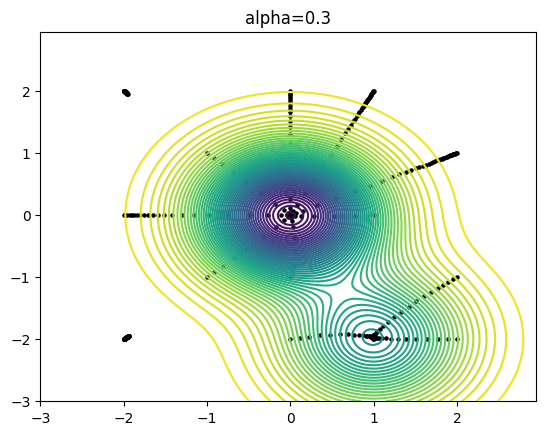

In [133]:
def g(x1: float, x2: float) -> float:
    return (
        1.5
        - np.exp(-(x1 ** (2)) - x2 ** (2))
        - 0.5 * np.exp(-((x1 - 1) ** (2)) - (x2 + 2) ** (2))
    )


def g_grad(x1: float, x2: float) -> float:
    g1 = 2 * x1 * np.exp(-1 * x1**2 - x2**2) + (x1-1) * np.exp(-(x1-1) ** 2 - (x2 + 2) ** 2)
    g2 = 2 * x2 * np.exp(-1 * x1**2 - x2**2) + (x2+2) * np.exp(-(x1-1) ** 2 - (x2 + 2) ** 2)
    return (g1, g2)


for alpha in alphas:
    results = measure_sgd(g, g_grad, starting_points, steps, alpha)
    # for sp, val in zip(starting_points, results):
    #     print(f'{alpha=}, {sp} -> {val}')